In [1]:
#data analysis
import pandas as pd
import numpy as np
import random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from scipy import stats

pd.set_option('display.max_columns', None)

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
df_train.shape, df_test.shape

((1460, 81), (1459, 80))

In [4]:
df_train = df_train.drop(['Alley', 'Fence','MiscFeature' ], axis=1)
df_test = df_test.drop(['Alley', 'Fence','MiscFeature' ], axis=1)

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Skewness: 1.882876
Kurtosis: 6.536282


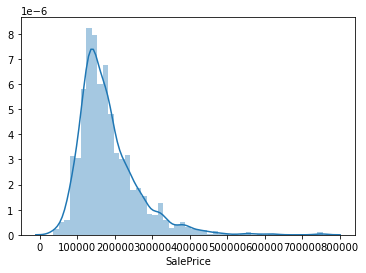

In [6]:
sns.distplot(df_train['SalePrice']);
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Saleprice data is skewed a point to consider!

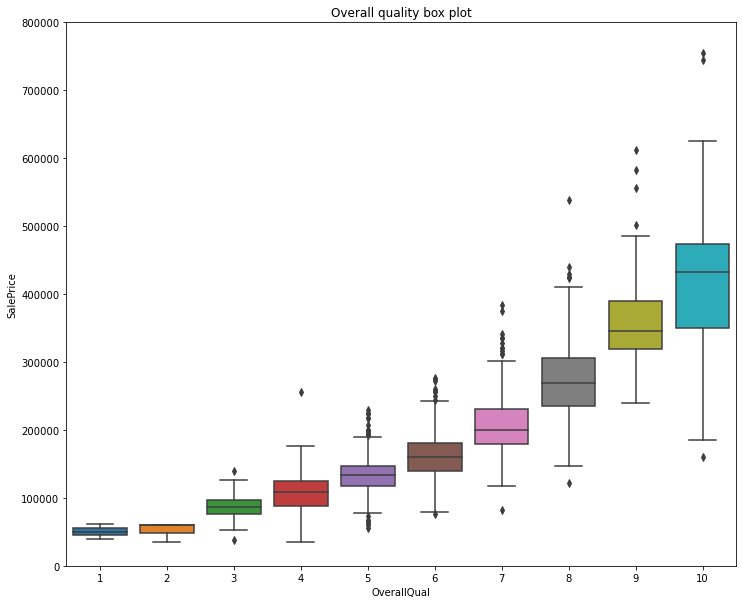

In [7]:
#box plot overallqual/saleprice

fig, ax = plt.subplots(figsize=(12, 10))
fig = sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])
fig.set(title= 'Overall quality box plot')
fig.axis(ymin=0, ymax=800000);

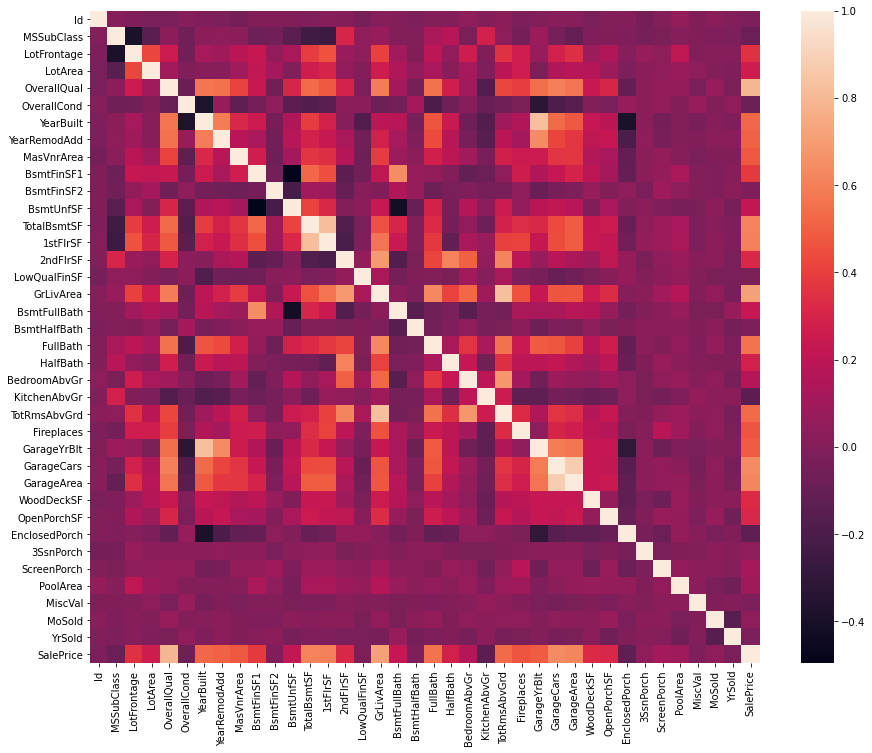

In [8]:
df_train_corr = df_train.corr()
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(df_train_corr);

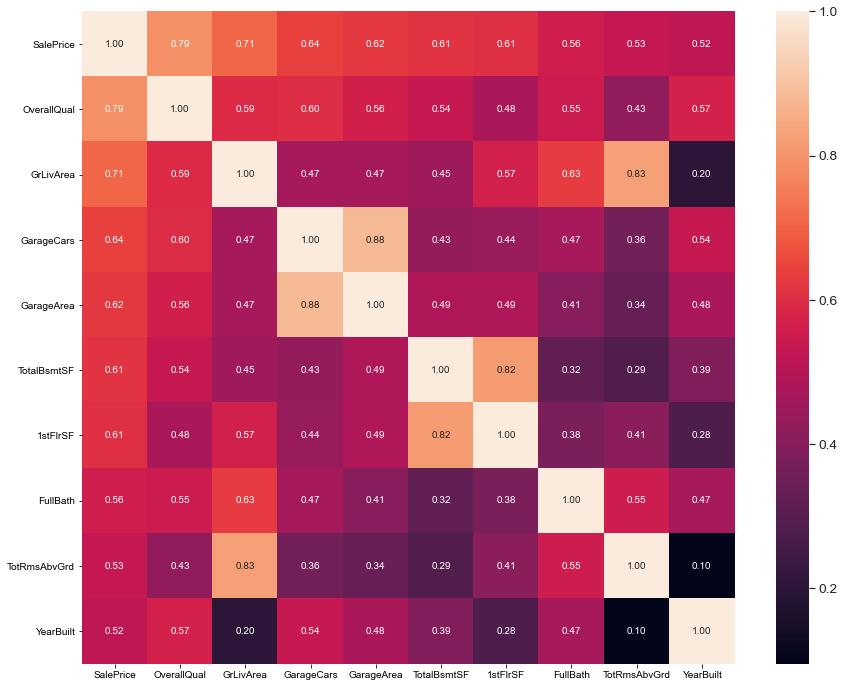

In [9]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = df_train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
fig, ax = plt.subplots(figsize=(15,12))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


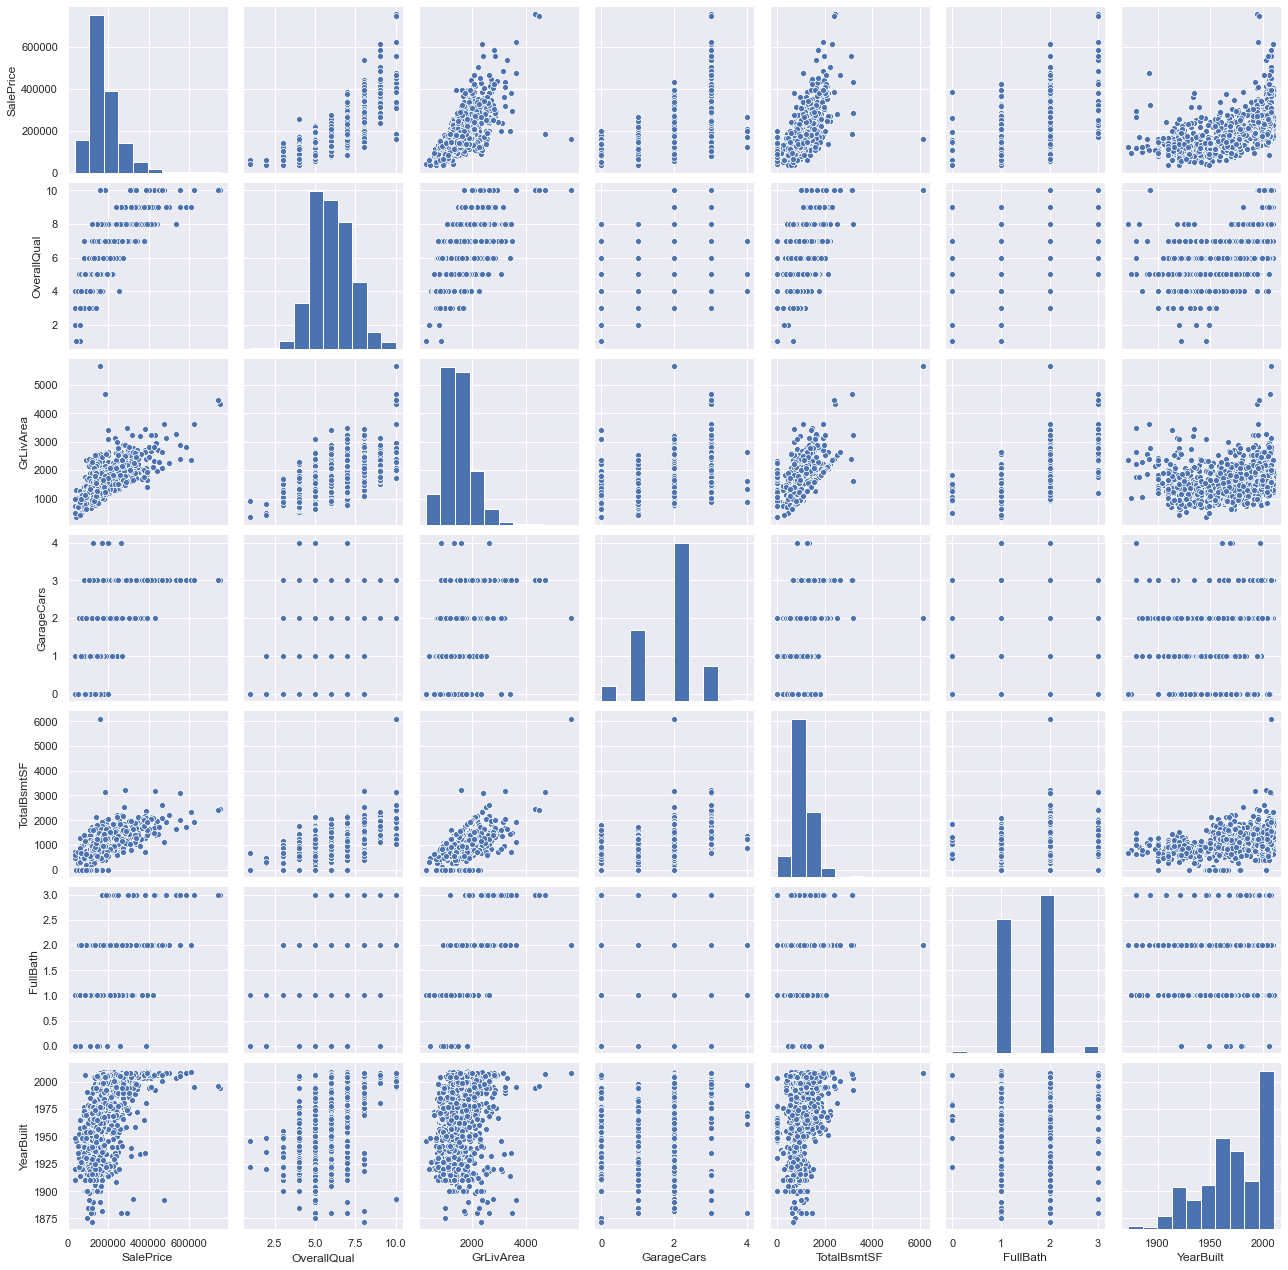

In [10]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars',
       'TotalBsmtSF', 'FullBath','YearBuilt']
sns.pairplot(df_train[cols], size=2.5)
plt.show();

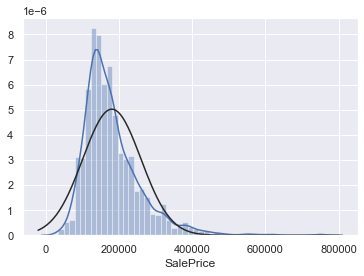

In [11]:
sns.distplot(df_train['SalePrice'], fit=norm)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well.

In [12]:
df_train['SalePrice'] = np.log(df_train['SalePrice'])

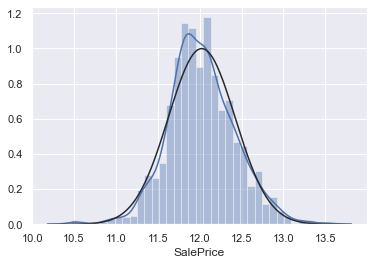

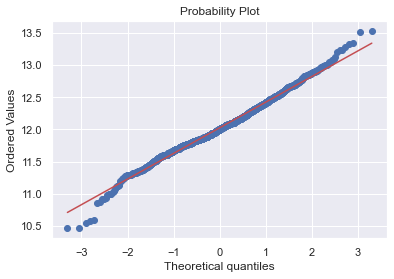

In [13]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

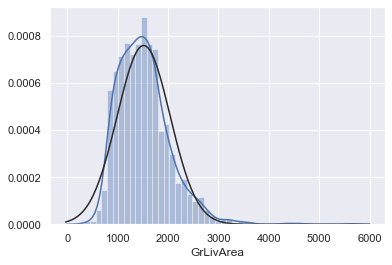

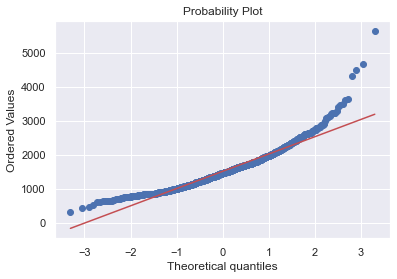

In [14]:
sns.distplot(df_train['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

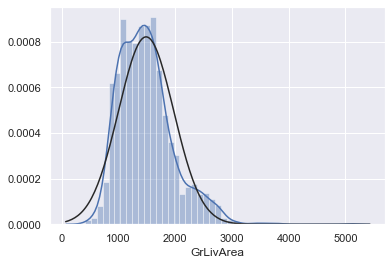

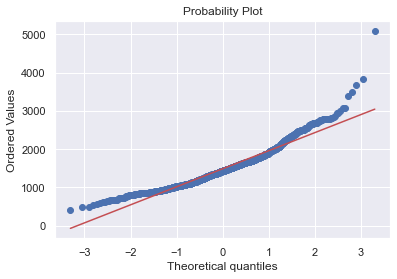

In [15]:
sns.distplot(df_test['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_test['GrLivArea'], plot=plt)

In [27]:
#data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])
df_test['GrLivArea'] = np.log(df_test['GrLivArea'])

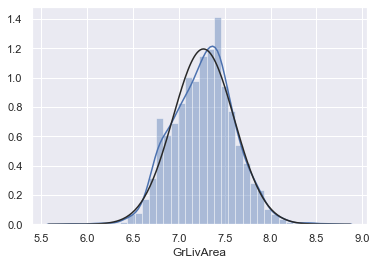

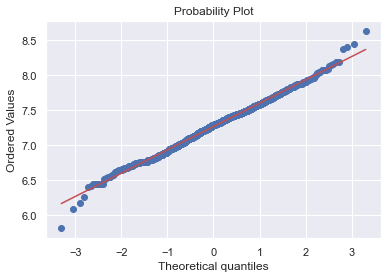

In [28]:
#transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

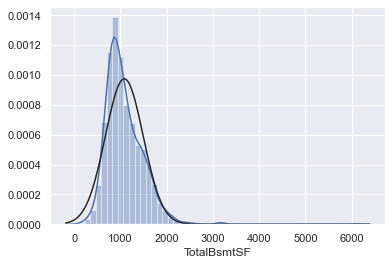

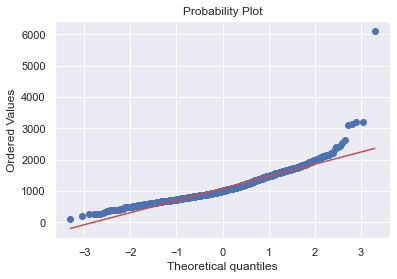

In [16]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

To apply a log transformation here, we ignore those with value zero. This way we can transform data, without losing the effect of having or not basement.

In [17]:
df_train.loc[df_train['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
df_test.loc[df_test['TotalBsmtSF']>0,'TotalBsmtSF'] = np.log(df_test['TotalBsmtSF'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


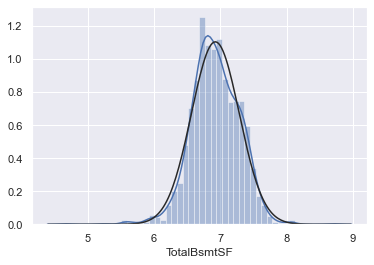

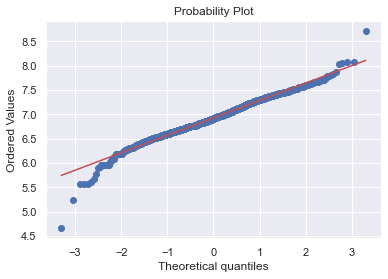

In [18]:
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

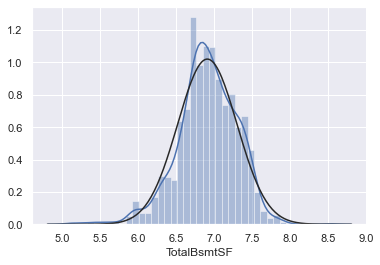

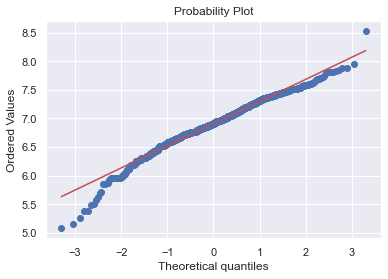

In [19]:
sns.distplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm)
fig = plt.figure()
res = stats.probplot(df_test[df_test['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [31]:
train_df = df_train[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF','FullBath','YearBuilt','SalePrice']]
test_df = df_test[['Id','OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF','FullBath','YearBuilt' ]]

In [32]:
train_df.isnull().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
SalePrice      0
dtype: int64

In [33]:
test_df.isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
GarageCars     1
TotalBsmtSF    1
FullBath       0
YearBuilt      0
dtype: int64

In [34]:
test_df.loc[test_df['GarageCars'].isnull()]

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
1116,2577,5,7.510978,NaN,6.755769,2,1923


In [35]:
np.mean(test_df[test_df['OverallQual']==5]['GarageCars'])

1.3723653395784543

In [36]:
test_df.loc[test_df['GarageCars'].isnull(), 'GarageCars']=1
test_df.isnull().sum()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Id             0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    1
FullBath       0
YearBuilt      0
dtype: int64

In [37]:
test_df.loc[test_df['TotalBsmtSF'].isnull()]

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
660,2121,4,6.79794,1.0,NaN,1,1946


In [38]:
np.mean(test_df[test_df['OverallQual']==4]['TotalBsmtSF'])

5.947402432822059

In [39]:
test_df.loc[test_df['TotalBsmtSF'].isnull(),'TotalBsmtSF' ]=5.94

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
test_df.isnull().sum()

Id             0
OverallQual    0
GrLivArea      0
GarageCars     0
TotalBsmtSF    0
FullBath       0
YearBuilt      0
dtype: int64

In [41]:
train_df.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,7.267774,1.767123,6.749534,1.565068,1971.267808,12.024051
std,1.382997,0.333550,0.747315,1.145685,0.550916,30.202904,0.399452
min,1.000000,5.811141,0.000000,0.000000,0.000000,1872.000000,10.460242
25%,5.000000,7.029530,1.000000,6.679285,1.000000,1954.000000,11.775097
50%,6.000000,7.288928,2.000000,6.899219,2.000000,1973.000000,12.001505
75%,7.000000,7.482541,2.000000,7.168772,2.000000,2000.000000,12.273731
max,10.000000,8.637994,4.000000,8.717682,3.000000,2010.000000,13.534473


In [42]:
test_df.describe()

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,6.078821,7.253745,1.765593,6.714112,1.570939,1971.357779
std,421.321334,1.436812,0.316152,0.775938,1.205595,0.555190,30.390071
min,1461.000000,1.000000,6.008813,0.000000,0.000000,0.000000,1879.000000
25%,1825.500000,5.000000,7.018849,1.000000,6.664409,1.000000,1953.000000
50%,2190.000000,6.000000,7.266827,2.000000,6.895683,2.000000,1973.000000
75%,2554.500000,7.000000,7.450661,2.000000,7.173191,2.000000,2001.000000
max,2919.000000,10.000000,8.536015,5.000000,8.536015,4.000000,2010.000000


train_df['GarageCars']=train_df.replace(train_df['GarageCars']>3,1)

In [43]:
train_df.loc[train_df['TotalBsmtSF']==train_df['TotalBsmtSF'].max()]

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
1298,10,8.637994,2,8.717682,2,2008,11.982929


In [44]:
train_df['TotalBsmtSF']=train_df['TotalBsmtSF'].replace(train_df['TotalBsmtSF'][1298],train_df['TotalBsmtSF'].mean())
train_df['GrLivArea']=train_df['GrLivArea'].replace(train_df['GrLivArea'][1298],train_df['GrLivArea'].mean())
train_df.describe()

<ipython-input-44-3208fe96c3c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['TotalBsmtSF']=train_df['TotalBsmtSF'].replace(train_df['TotalBsmtSF'][1298],train_df['TotalBsmtSF'].mean())
<ipython-input-44-3208fe96c3c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['GrLivArea']=train_df['GrLivArea'].replace(train_df['GrLivArea'][1298],train_df['GrLivArea'].mean())


,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,7.266836,1.767123,6.748186,1.565068,1971.267808,12.024051
std,1.382997,0.331614,0.747315,1.144525,0.550916,30.202904,0.399452
min,1.000000,5.811141,0.000000,0.000000,0.000000,1872.000000,10.460242
25%,5.000000,7.029530,1.000000,6.679285,1.000000,1954.000000,11.775097
50%,6.000000,7.287217,2.000000,6.898715,2.000000,1973.000000,12.001505
75%,7.000000,7.482119,2.000000,7.168002,2.000000,2000.000000,12.273731
max,10.000000,8.450198,4.000000,8.072779,3.000000,2010.000000,13.534473


In [45]:
test_df.loc[test_df['TotalBsmtSF']==test_df['TotalBsmtSF'].max()]

,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
1089,2550,10,8.536015,3.0,8.536015,2,2008


In [46]:
test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].replace(test_df['TotalBsmtSF'][1089],test_df['TotalBsmtSF'].mean())
test_df['GrLivArea']=test_df['GrLivArea'].replace(test_df['GrLivArea'][1089],test_df['GrLivArea'].mean())
test_df.describe()

<ipython-input-46-a593c2620c70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['TotalBsmtSF']=test_df['TotalBsmtSF'].replace(test_df['TotalBsmtSF'][1089],test_df['TotalBsmtSF'].mean())
<ipython-input-46-a593c2620c70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GrLivArea']=test_df['GrLivArea'].replace(test_df['GrLivArea'][1089],test_df['GrLivArea'].mean())


,Id,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,6.078821,7.252866,1.765593,6.712863,1.570939,1971.357779
std,421.321334,1.436812,0.314362,0.775938,1.204650,0.555190,30.390071
min,1461.000000,1.000000,6.008813,0.000000,0.000000,0.000000,1879.000000
25%,1825.500000,5.000000,7.018849,1.000000,6.664409,1.000000,1953.000000
50%,2190.000000,6.000000,7.265430,2.000000,6.895683,2.000000,1973.000000
75%,2554.500000,7.000000,7.450661,2.000000,7.171657,2.000000,2001.000000
max,2919.000000,10.000000,8.248006,5.000000,7.953670,4.000000,2010.000000


In [47]:
train_df = train_df.sample(frac=1).reset_index(drop=True)#Shuffling data

In [48]:
X = train_df[['OverallQual','GrLivArea', 'GarageCars','FullBath','YearBuilt','TotalBsmtSF']]
Y = train_df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [49]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.8108928999194163


In [50]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values
print(coef)

<bound method Series.sort_values of OverallQual    0.095763
GrLivArea      0.471789
GarageCars     0.080386
FullBath      -0.029676
YearBuilt      0.002933
TotalBsmtSF    0.041511
dtype: float64>


In [51]:
from sklearn.metrics import r2_score
y_pred = linear_model.predict(x_test)

print('Testong score: ', r2_score(y_test, y_pred))

Testong score:  0.8561073085013842


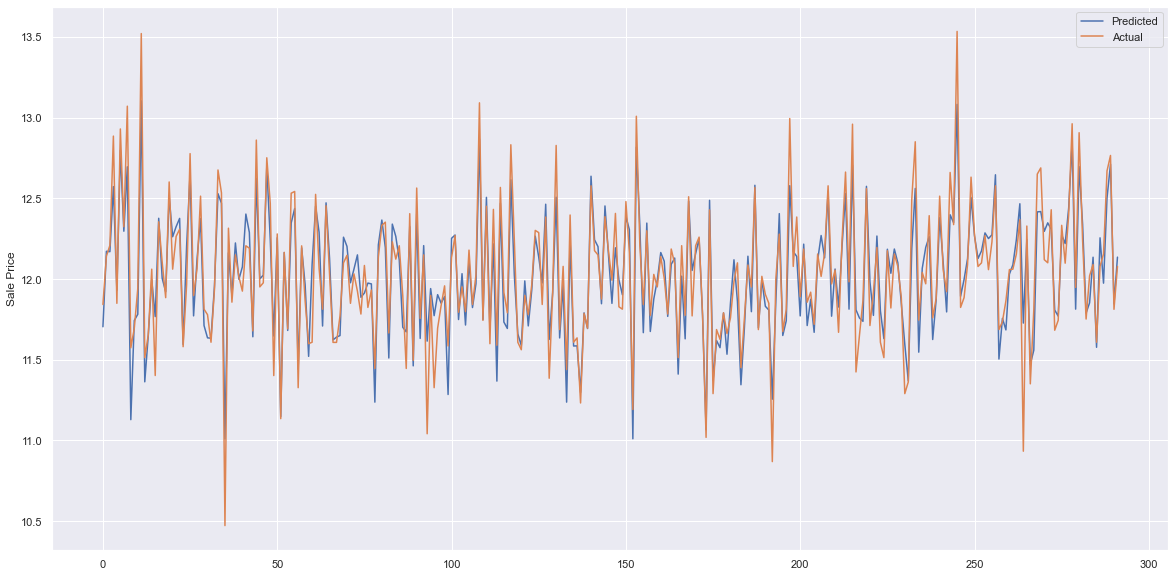

In [52]:
plt.figure(figsize = (20,10))

plt.plot(y_pred, label='Predicted')
plt.plot(y_test.values, label='Actual')

plt.ylabel('Sale Price')

plt.legend()
plt.show()

In [53]:
from sklearn import preprocessing
#to normalize if it is needed
for i in X.columns:
    X[[i]] = preprocessing.scale(X[[i]].astype('float64'))
X

<ipython-input-53-5a9f164ffd32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[[i]] = preprocessing.scale(X[[i]].astype('float64'))
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-53-5a9f164ffd32>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

,OverallQual,GrLivArea,GarageCars,FullBath,YearBuilt,TotalBsmtSF
0,-0.795151,0.604931,-1.026858,-1.026041,-3.022858,-0.256078
1,-0.071836,0.438383,0.311725,-1.026041,-0.373198,0.206733
2,-0.071836,1.296622,0.311725,0.789741,-0.174474,-0.176029
3,1.374795,1.049679,1.650307,0.789741,1.117235,0.685618
4,-0.795151,-1.448319,-1.026858,-1.026041,-1.101855,-1.312052
...,...,...,...,...,...,...
1455,-0.071836,0.485377,0.311725,0.789741,0.885390,-0.051206
1456,1.374795,1.513412,1.650307,0.789741,0.918511,0.335898
1457,0.651479,0.151965,0.311725,0.789741,1.117235,0.409501
1458,-1.518467,-1.591245,0.311725,-1.026041,0.355458,-0.007734


In [54]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [55]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train)
print('Training score: ', linear_model.score(x_train, y_train))

Training score:  0.822645144174152


In [56]:
predictors = x_train.columns
coef = pd.Series(linear_model.coef_, predictors).sort_values
print(coef)

<bound method Series.sort_values of OverallQual    0.134145
GrLivArea      0.163168
GarageCars     0.059946
FullBath      -0.014095
YearBuilt      0.086905
TotalBsmtSF    0.037497
dtype: float64>


In [57]:
from sklearn.metrics import r2_score
y_pred = linear_model.predict(x_test)

print('Testong score: ', r2_score(y_test, y_pred))

Testong score:  0.8170934412655142


In [58]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, Lars, SGDRegressor

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [59]:
lasso = Lasso(alpha=0.5).fit(x_train, y_train)
print('Training score_lasso: ', lasso.score(x_train, y_train))

y_pred = lasso.predict(x_test)

print('Testong score_lasso: ', r2_score(y_test, y_pred))

Training score_lasso:  0.0
Testong score_lasso:  -0.004806070108360316


In [60]:
ridge = Ridge(alpha=0.1, normalize=True).fit(x_train, y_train)
print('Training score_ridge: ', ridge.score(x_train, y_train))

y_pred = ridge.predict(x_test)

print('Testong score_ridge: ', r2_score(y_test, y_pred))

Training score_ridge:  0.8196671529146701
Testong score_ridge:  0.8131496109775012


In [61]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=1, normalize=True, max_iter=10000
                        , warm_start=True).fit(x_train, y_train)
print('Training score_elastic_net: ', elastic_net.score(x_train, y_train))

y_pred = elastic_net.predict(x_test)

print('Testong score_elastic_net: ', r2_score(y_test, y_pred))

Training score_elastic_net:  0.0
Testong score_elastic_net:  -0.004806070108360316


In [62]:
X = train_df[['OverallQual', 'YearBuilt', 'TotalBsmtSF','GrLivArea' ]]
Y = train_df['SalePrice']

X_Test = test_df[['OverallQual', 'YearBuilt', 'TotalBsmtSF','GrLivArea' ]]

In [63]:
X_Test.isnull().sum()

OverallQual    0
YearBuilt      0
TotalBsmtSF    0
GrLivArea      0
dtype: int64

In [64]:
linear_model = LinearRegression(normalize=True).fit(X, Y)
print('Training score: ', linear_model.score(X, Y))

Training score:  0.8077255448751841


In [65]:
Y_pred = linear_model.predict(X_Test)
Y_pred

array([11.63200412, 11.94822302, 12.05723999, ..., 11.80013093,
       11.77584945, 12.37054979])

In [66]:
sub = pd.DataFrame()
sub['Id'] = test_df['Id']

In [67]:
sub['SalePrice'] = np.exp(Y_pred)
sub

,Id,SalePrice
0,1461,112645.851177
1,1462,154542.284384
2,1463,172342.661509
3,1464,191411.248953
4,1465,210845.806094
...,...,...
1454,2915,112951.382949
1455,2916,112951.382949
1456,2917,133269.800398
1457,2918,130072.783414


In [68]:
sub.to_csv('submission_LR2.csv',index=False)